<a href="https://colab.research.google.com/github/deepak-ucfknight/COT5405/blob/master/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification of CIFAR10 with categorical crossentropy loss - Keras implementation**

In [1]:
# import headers
import keras
from keras.datasets import cifar10
from keras import backend as K
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import math
from keras.preprocessing.image import  ImageDataGenerator



Using TensorFlow backend.


## **Loading the Image Data**

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# backup of original label info for visualization purpose
train_labels = np.array(np.squeeze(y_train))
test_labels = np.array(np.squeeze(y_test))

170500096/170498071 [==============================] - 81s 0us/step


## **Variables and Hyper Parameters**

In [0]:
# variables
rows = 32
cols = 32
channels = 3
num_classes = 10
batchsize = 128
k = 5;
iterations = 5
split_index = math.ceil(x_train.shape[0] * 0.8)

## **Utility Functions**

In [0]:
def getImageLabel(label_data):
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return class_names[label_data];

## **Preparing the Image Data**

In [0]:
# data reshaping based on tensorflow backend
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, rows, cols)
    x_test = x_test.reshape(x_test.shape[0], channels, rows, cols)
    inputshape = (channels, rows, cols)
else:
    x_train = x_train.reshape(x_train.shape[0], rows, cols, channels)
    x_test = x_test.reshape(x_test.shape[0], rows, cols, channels)
    inputshape = (rows, cols, channels)
    

# data normalization
x_train = x_train / 255;
x_test = x_test / 255;


# categorical of conversion of labels

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## **Displaying Some Images of the Dataset**

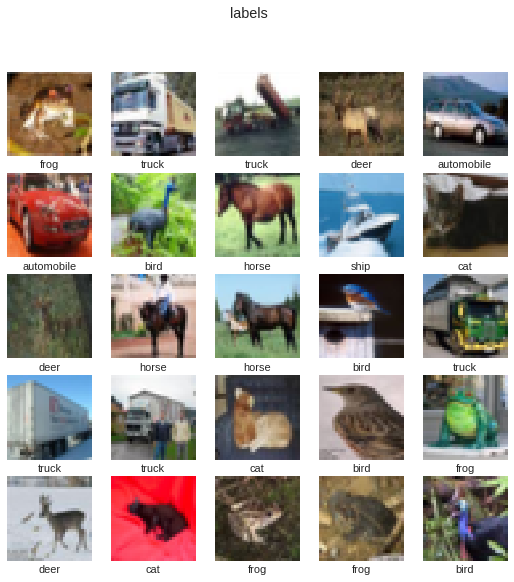

In [6]:
plt.figure(figsize=(9, 9))
plt.suptitle("labels")
indices = np.random.choice(np.arange(x_train.shape[0]), size=25, replace=False)
for index in np.arange(25):
  plt.subplot(5, 5, index + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[index], cmap=plt.cm.binary)
  plt.xlabel(getImageLabel(train_labels[index]))
plt.show()

## **Models:**

## **Preparation **

In [0]:
# model

def get_model_1():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputshape))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [0]:
def get_model_2():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputshape))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  
  return model

In [0]:
def get_model_3():
  model = Sequential()
  

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputshape))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [0]:
def get_model_4():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputshape))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [0]:
def get_model_5(): # best model achieved 92% accuracy when ran for 50 epochs
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputshape))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  
  model.add(Conv2D(num_classes, kernel_size=(3, 3), padding='same'))
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))
  return model

## **Training Simple Hold Out Validation**

In [0]:
def train_model_simple(base_model, model_id, x_train, y_train, x_test, y_test, batchsize, iterations, score_dict):
  
  train_x = x_train[:split_index]
  train_y = y_train[:split_index]
  val_x   = x_train[split_index: ]
  val_y   = y_train[split_index: ]
    
  datagen = ImageDataGenerator(rotation_range=45,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=False)
  datagen.fit(train_x)
  
  optimizer_adam = keras.optimizers.adam(lr=0.001,decay=1e-6)
  
  model = base_model
    
  model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])

  early_stop = EarlyStopping('val_loss', patience=5)

  reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=3, verbose=1)

  callbacks = [early_stop, reduce_lr]

  train_epoch_steps = 40000 / batchsize

  val_epoch_steps = 10000 / batchsize

  model.fit_generator(datagen.flow(train_x, train_y, batch_size=batchsize),
                      epochs=iterations,
                      steps_per_epoch=train_epoch_steps,
                      validation_steps=val_epoch_steps,
                      validation_data=(val_x, val_y),
                      callbacks=callbacks)
  
  scores = model.evaluate(x_test, y_test)
  
  score_dict[model_id] = [model, scores[1]]

## **Training with K fold Validation : K -> 5**

In [0]:
# Training the model

def train_model_k_fold(base_model, x_train, y_train, x_test, y_test, batchsize, iterations):
  k_fold_dict = {}

  sum_of_accuracies = 0

  for i in range(k):

    x_train,y_train = shuffle(x_train, y_train)
    x_train_fold = x_train[:split_index]
    y_train_fold = y_train[:split_index]
    x_val_fold   = x_train[split_index: ]
    y_val_fold   = y_train[split_index: ]

    
    datagen = ImageDataGenerator(rotation_range=45,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,vertical_flip=False)
    datagen.fit(x_train_fold)
    
    optimizer_adam = keras.optimizers.adam(lr=0.001,decay=1e-6)
    
    model = base_model
    
    model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stop = EarlyStopping('val_loss', patience=5)

    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=3, verbose=1)
    
    callbacks = [early_stop, reduce_lr]
    
    train_epoch_steps = 40000 / batchsize

    val_epoch_steps = 10000 / batchsize

    model.fit_generator(datagen.flow(x_train, y_train, batch_size=batchsize),
                        epochs=iterations,
                        steps_per_epoch=train_epoch_steps,
                        validation_steps=val_epoch_steps,
                        validation_data=(x_val_fold, y_val_fold),
                        callbacks=callbacks)

    scores = model.evaluate(x_test, y_test)

    sum_of_accuracies += scores[1]

    k_fold_dict[i+1] = [model,scores[1]] # selecting the best model based on accuracy on test, we can also do this by loss as well.
    
  
  
  average_score = sum_of_accuracies / 5;

  score_delta = 100 # some max number
  final_model = 0
  final_score = 0

  for fold in k_fold_dict:
    if(score_delta > abs(k_fold_dict[fold][1] - average_score)):
      score_delta = abs(k_fold_dict[fold][1] - average_score)
      final_model = k_fold_dict[fold][0]
      final_model_score = k_fold_dict[fold][1]
      
  return final_model, final_model_score

## **Dictionary Data structure to store the results of 5 architectures**

In [0]:
score_dict = {}

## **Training on Model 1**

In [15]:
# Evaluate the model
train_model_simple(get_model_1(),1,x_train,y_train,x_test,y_test,batchsize,iterations,score_dict)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
313/312 [==============================] - 31s 99ms/step - loss: 1.8416 - acc: 0.3110 - val_loss: 1.4656 - val_acc: 0.4627
Epoch 2/5
313/312 [==============================] - 25s 79ms/step - loss: 1.5181 - acc: 0.4464 - val_loss: 1.2376 - val_acc: 0.5568
Epoch 3/5
313/312 [==============================] - 26s 83ms/step - loss: 1.3774 - acc: 0.5012 - val_loss: 1.1438 - val_acc: 0.5937
Epoch 4/5
313/312 [==============================] - 25s 79ms/step - loss: 1.2750 - acc: 0.5442 - val_loss: 1.0663 - val_acc: 0.6241
Epoch 5/5
10000/10000 [==============================] - 2s 150us/step


## **Training on Model 2**

In [16]:
train_model_simple(get_model_2(),2,x_train,y_train,x_test,y_test,batchsize,iterations,score_dict)

Epoch 1/5
313/312 [==============================] - 25s 81ms/step - loss: 1.8335 - acc: 0.3245 - val_loss: 1.5080 - val_acc: 0.4563
Epoch 2/5
313/312 [==============================] - 24s 76ms/step - loss: 1.5494 - acc: 0.4360 - val_loss: 1.3180 - val_acc: 0.5305
Epoch 3/5
313/312 [==============================] - 24s 77ms/step - loss: 1.4158 - acc: 0.4872 - val_loss: 1.2832 - val_acc: 0.5516
Epoch 4/5
313/312 [==============================] - 24s 76ms/step - loss: 1.3324 - acc: 0.5198 - val_loss: 1.1131 - val_acc: 0.6027
Epoch 5/5
10000/10000 [==============================] - 1s 146us/step


## **Training on Model 3**

In [17]:
train_model_simple(get_model_3(),3,x_train,y_train,x_test,y_test,batchsize,iterations,score_dict)

Epoch 1/5
313/312 [==============================] - 31s 100ms/step - loss: 1.9216 - acc: 0.3867 - val_loss: 2.1012 - val_acc: 0.3759
Epoch 2/5
313/312 [==============================] - 29s 92ms/step - loss: 1.4506 - acc: 0.5071 - val_loss: 1.6659 - val_acc: 0.4744
Epoch 3/5
313/312 [==============================] - 29s 93ms/step - loss: 1.2811 - acc: 0.5643 - val_loss: 1.1905 - val_acc: 0.5908
Epoch 4/5
313/312 [==============================] - 29s 92ms/step - loss: 1.1765 - acc: 0.5995 - val_loss: 1.2793 - val_acc: 0.5779
Epoch 5/5
10000/10000 [==============================] - 2s 222us/step


## **Training on Model 4**

In [18]:
train_model_simple(get_model_4(),4,x_train,y_train,x_test,y_test,batchsize,iterations,score_dict)

Epoch 1/5
313/312 [==============================] - 28s 91ms/step - loss: 1.9718 - acc: 0.3624 - val_loss: 1.5356 - val_acc: 0.4606
Epoch 2/5
313/312 [==============================] - 26s 82ms/step - loss: 1.4860 - acc: 0.4716 - val_loss: 1.3967 - val_acc: 0.5129
Epoch 3/5
313/312 [==============================] - 26s 84ms/step - loss: 1.3262 - acc: 0.5271 - val_loss: 1.3676 - val_acc: 0.5482
Epoch 4/5
313/312 [==============================] - 26s 83ms/step - loss: 1.2194 - acc: 0.5649 - val_loss: 1.4070 - val_acc: 0.5590
Epoch 5/5
10000/10000 [==============================] - 2s 178us/step


## **Training on Model 5**

In [19]:
train_model_simple(get_model_5(),5,x_train,y_train,x_test,y_test,batchsize,iterations,score_dict)

Epoch 1/5
313/312 [==============================] - 35s 111ms/step - loss: 1.6339 - acc: 0.4073 - val_loss: 1.6157 - val_acc: 0.4754
Epoch 2/5
313/312 [==============================] - 29s 94ms/step - loss: 1.3158 - acc: 0.5247 - val_loss: 1.5444 - val_acc: 0.5045
Epoch 3/5
313/312 [==============================] - 31s 100ms/step - loss: 1.1685 - acc: 0.5833 - val_loss: 1.0384 - val_acc: 0.6385
Epoch 4/5
313/312 [==============================] - 29s 94ms/step - loss: 1.0741 - acc: 0.6188 - val_loss: 1.1604 - val_acc: 0.6151
Epoch 5/5
10000/10000 [==============================] - 2s 226us/step


## **Finding the Best Model out of 5 models**

In [20]:

best_model_id, best_model, best_score = 0,0,0

for model_id in score_dict:
  if(best_score < score_dict[model_id][1]):
    best_model_id = model_id
    best_score = score_dict[model_id][1]
    best_model = score_dict[model_id][0]
    

print("Best Model :", best_model_id)
print("Score of the Model :", best_score)

  


Best Model : 5
Score of the Model : 0.6676


## **Setting up best model for k fold validation**

In [21]:
k_fold_model = 0

if(best_model_id == 1):
  k_fold_model = get_model_1()
elif(best_model_id == 2):
  k_fold_model = get_model_2()
elif(best_model_id == 3):
  k_fold_model = get_model_3()
elif(best_model_id == 4):
  k_fold_model = get_model_4()
elif(best_model_id == 5):
  k_fold_model = get_model_5()
  

final_model, final_score = train_model_k_fold(k_fold_model, x_train, y_train, x_test, y_test, batchsize, iterations)

Epoch 1/5
313/312 [==============================] - 35s 110ms/step - loss: 1.6305 - acc: 0.4066 - val_loss: 1.5205 - val_acc: 0.4904
Epoch 2/5
313/312 [==============================] - 29s 94ms/step - loss: 1.3237 - acc: 0.5226 - val_loss: 1.3728 - val_acc: 0.5446
Epoch 3/5
313/312 [==============================] - 29s 93ms/step - loss: 1.1743 - acc: 0.5810 - val_loss: 1.1512 - val_acc: 0.6031
Epoch 4/5
313/312 [==============================] - 30s 95ms/step - loss: 1.0831 - acc: 0.6163 - val_loss: 1.0571 - val_acc: 0.6299
Epoch 5/5
10000/10000 [==============================] - 2s 227us/step
Epoch 1/5
313/312 [==============================] - 34s 110ms/step - loss: 0.9838 - acc: 0.6551 - val_loss: 0.9354 - val_acc: 0.6887
Epoch 2/5
313/312 [==============================] - 29s 94ms/step - loss: 0.9188 - acc: 0.6777 - val_loss: 0.7958 - val_acc: 0.7253
Epoch 3/5
313/312 [==============================] - 29s 93ms/step - loss: 0.8862 - acc: 0.6911 - val_loss: 0.8425 - val_acc: 0.7

## **Results of K fold validation**

In [22]:
print("Best K fold Model :", final_model)
print("Score of the Model :", final_score)

Best K fold Model : <keras.engine.sequential.Sequential object at 0x7f4acb6f4630>
Score of the Model : 0.7401


## **Confusion matrix**

## **Result of best model on Simple hold out validation**

In [23]:

y_pred_test = np.argmax(best_model.predict(x_test), axis=1)
cm = confusion_matrix(y_true=test_labels, y_pred=y_pred_test)
print(cm)

[[781  52  14   1   8   2   4  25  37  76]
 [  6 917   0   0   0   1   3   2   2  69]
 [140  28 421  22  61  33 172  57  17  49]
 [ 36  47  31 307  63  98 215  62  50  91]
 [ 32   4  47  18 546   9 227  87   6  24]
 [ 21  22  32 130  48 468  72 122  26  59]
 [ 10  25  19  15   6   3 879   6  10  27]
 [ 16  10  12  10  38  19  30 815   1  49]
 [122  81   2   5   7   0   8   3 721  51]
 [ 21 133   2   1   2   0   6   7   7 821]]


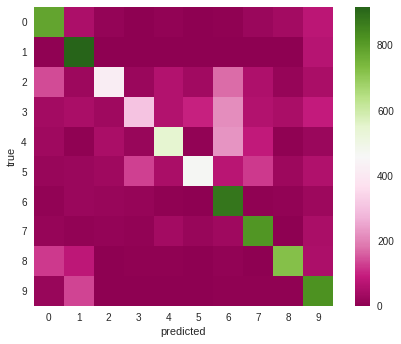

In [24]:
plt.imshow(cm, interpolation=None, cmap=plt.cm.PiYG)
# https://matplotlib.org/examples/color/colormaps_reference.html
plt.grid(None)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

## **Result of the best model with K fold validation**

In [25]:
y_pred_test = np.argmax(final_model.predict(x_test), axis=1)
cm = confusion_matrix(y_true=test_labels, y_pred=y_pred_test)
print(cm)

[[850  25  21   4   4   0   3   8  56  29]
 [  3 958   0   0   0   1   0   1  11  26]
 [ 48  15 697  23  58  23  69  25  12  30]
 [ 35  15  45 598  49  59 101  35  30  33]
 [ 18   5  45  17 793   7  62  39   9   5]
 [ 10  14  31 132  37 643  47  49  12  25]
 [ 11   6   9  18  15   2 903   7  16  13]
 [ 24   6   6  10  34  15  12 872   1  20]
 [ 42  33   0   1   1   1   2   0 890  30]
 [ 33  66   3   1   0   0   2   5   9 881]]


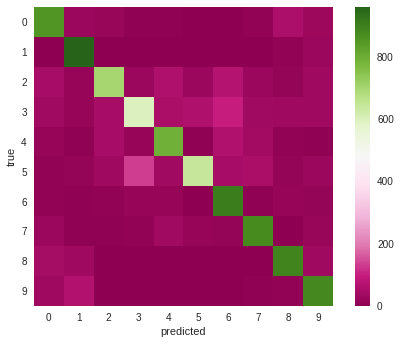

In [26]:
plt.imshow(cm, interpolation=None, cmap=plt.cm.PiYG)
# https://matplotlib.org/examples/color/colormaps_reference.html
plt.grid(None)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()